In [2]:
import matplotlib.pyplot as plt
import os, shutil
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline


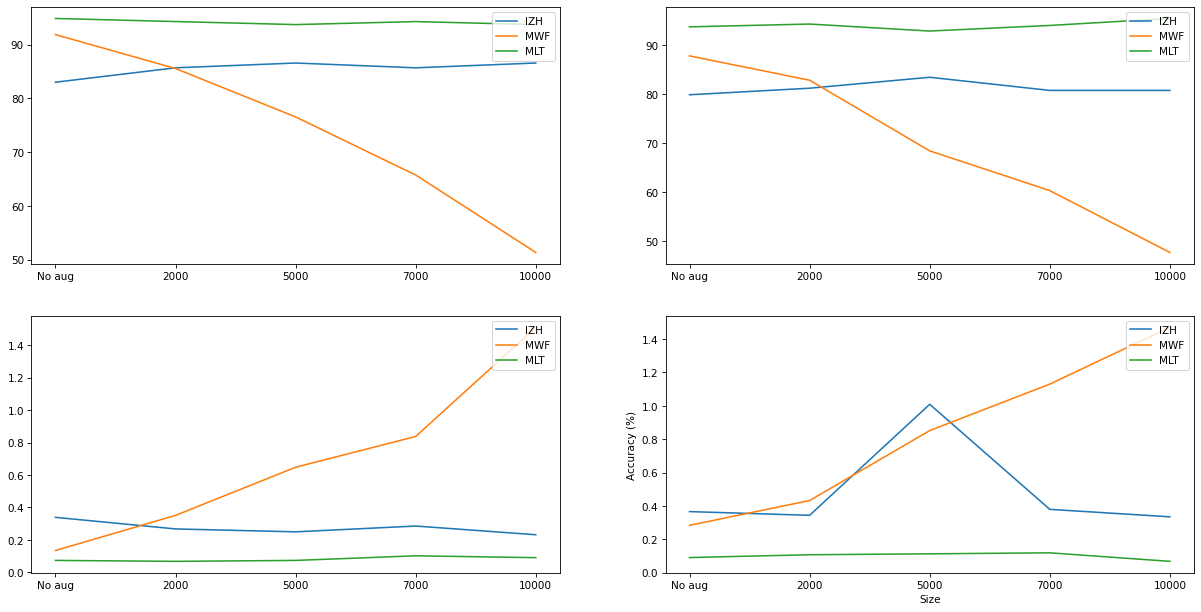

In [47]:
def acc_vs_datasize(fp):

    df = pd.read_csv(fp, index_col=None)
    # print(df.head())

    # izh_dev_acc = [(i)]

    x = ['No aug','2000','5000','7000','10000']

    d_acc = df.iloc[:,[1,5,9]]
    t_acc = df.iloc[:,[3,7,11]]
    d_edit = df.iloc[:,[2,6,10]]
    t_edit = df.iloc[:,[4,8,12]]

    # print(d_acc)
    data = [d_acc,t_acc,d_edit,t_edit]
    fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))

    plt.plot(x,d_acc)

    # for i in range(2):
    #     for j in range(2):

    #         ax[i,j].plot(x,data[int((str(i)+str(j)),2)],label=d_acc.iloc[0,:])
    #         ax[i,j].legend(['IZH','MWF','MLT'], loc='upper right', borderaxespad=0.5)
    #     # ax[i].title('Dev accuracy vs. augmented data size')
    #         plt.xlabel('Size')
    #         plt.ylabel('Accuracy (%)')
    # plt.show()


    # plt.plot(x,d_acc, label=d_acc.iloc[0,:])
    # plt.legend(['IZH','MWF','MLT'], loc='upper right', borderaxespad=0.5)
    # plt.title('Dev accuracy vs. augmented data size')
acc_vs_datasize('acc_vs_dataset_size.csv')




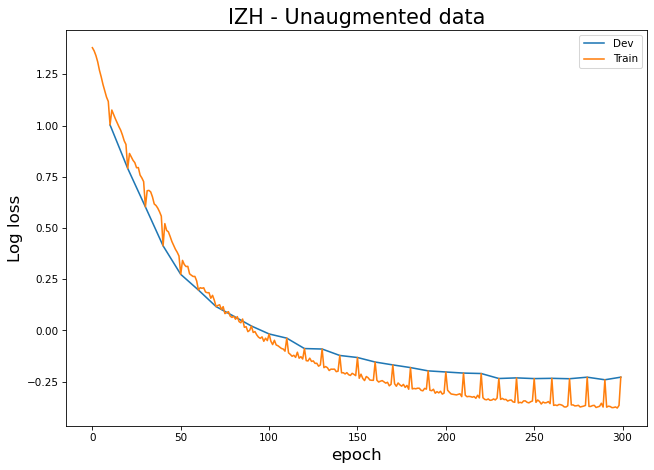

In [298]:
def loss_vs_epoch(dev_loss_loc, train_loss_loc, ti):
    """Create plot of dev and train loss per epoch for transformer model
    
    Args:
        dev_loss (string): DF of loss and epoch
        train_loss (string): DF of loss and epoch
    """

    dev = pd.read_csv(dev_loss_loc, index_col=None).iloc[:,1:]
    train = pd.read_csv(train_loss_loc, index_col=None).iloc[:,1:]
    plt.figure(figsize=(10,7))

    plt.plot(dev['epoch'], np.log(dev['dev_loss']), label="Dev")
    plt.plot(train['epoch'], np.log(train['train_loss']), label="Train")
    plt.xlabel('epoch', size=16)
    plt.ylabel('Log loss', size=16)
    plt.legend(loc='upper right', borderaxespad=0.5)
    plt.title(ti, size=20)

loss_vs_epoch('./csv/izh_dev_loss.csv', './csv/izh_train_loss.csv', 'Loss vs. Epoch for IZH')




Text(0.5, 1.0, 'Loss vs Epoch on IZH for Different Data Augmentation')

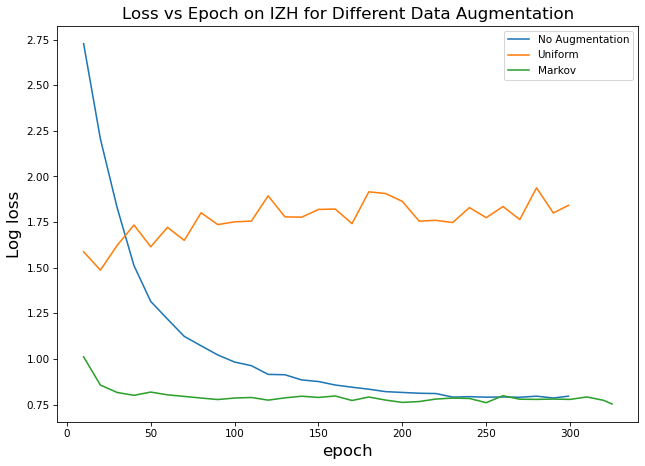

In [314]:
## Plotting dev log loss vs epoch for IZH augmentation set differnces

izh_noaug = pd.read_csv('./csv/izh_dev_loss.csv', index_col=None).iloc[:,1:]
izh_ahall = pd.read_csv('./csv/izh_ahall_dev_loss.csv', index_col=None).iloc[:,1:]
izh_d10k_o1_f = pd.read_csv('./csv/izh_d10k_o1_f_dev_loss.csv', index_col=None).iloc[:,1:]

plt.figure(figsize=(10,7))
plt.plot(izh_noaug['epoch'], (izh_noaug['dev_loss']), label="No Augmentation")
plt.plot(izh_ahall['epoch'], (izh_ahall['dev_loss']), label="Uniform")
plt.plot(izh_d10k_o1_f['epoch'], (izh_d10k_o1_f['dev_loss']), label="Markov")

plt.xlabel('epoch', size=16)
plt.ylabel('Log loss', size=16)
plt.legend(loc='upper right', borderaxespad=0.5)
plt.title('Loss vs Epoch on IZH for Different Data Augmentation', size=16)

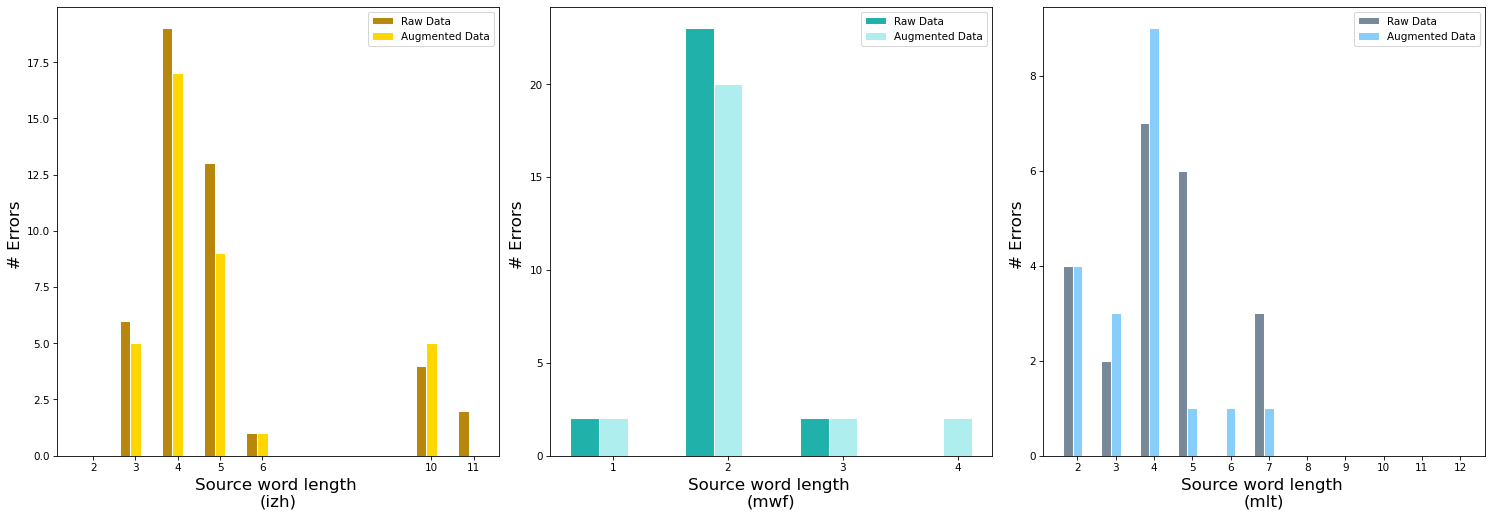

In [40]:
## Plotting multiple bar charts of errors groupby word length


lang = ['izh', 'mwf', 'mlt']
vers = ''
vers2 = '_d2k_o1_f_lcs-3'
dfs = []

for l in lang:
    test = pd.read_csv('./original/'+l+vers+'.decode.test.tsv', sep='\t')
    test_rule = pd.read_csv('../task0-data/processed/'+l+vers+'/'+l+vers+'.tst', sep='\t', 
                            names=['source','target','rule'])
    test.insert(loc=0, column='source', value=test_rule['source'])
    test.insert(loc=0, column='rule', value=test_rule['rule'])
    test['source_len'] = [len(e) for e in list(test['source'])]

    test2 = pd.read_csv('./original/'+l+vers2+'.decode.test.tsv', sep='\t')
    test2_rule = pd.read_csv('../task0-data/processed/'+l+vers2+'/'+l+vers2+'.tst', sep='\t', 
                            names=['source','target','rule'])
    test2.insert(loc=0, column='source', value=test2_rule['source'])
    test2.insert(loc=0, column='rule', value=test2_rule['rule'])
    test2['source_len'] = [len(e) for e in list(test2['source'])]
    
    
    errors = test.groupby('source_len')['dist'].agg(lambda x: x.ne(0).sum())
    errors2 = test2.groupby('source_len')['dist'].agg(lambda x: x.ne(0).sum())

    s2 = test.groupby('source_len')['dist'].count()  # Can be changed to what we want
    df_test = pd.DataFrame(zip(errors.index, errors.values,errors2.values,s2.values, [l for i in range(len(errors.index))]), 
                            columns=['wlength','errors','errors2','s2','lang'])
   
    dfs.append(df_test)
cols = [['darkgoldenrod', 'lightseagreen', 'lightslategrey'],['gold','paleturquoise','lightskyblue'], ['red','blue','green'] ]  
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(20,7))
for i in range(len(lang)):
    
    barWidth=0.25
    x1 = dfs[i]['wlength']
    x2 = x1 + barWidth
    x3 = x2 + barWidth
    # Set first bar: Errors
    ax[i].bar(x1, dfs[i]['errors'], width=barWidth, color=cols[0][i], edgecolor='white', 
            tick_label=dfs[i]['wlength'], label='Raw Data')

    #Second bar is augmented errors
    ax[i].bar(x2, dfs[i]['errors2'], width=barWidth, color=cols[1][i], edgecolor='white', 
            tick_label=dfs[i]['wlength'], label='Augmented Data')         
    
    ax[i].set_xlabel(f"Source word length \n({lang[i]})", size=16)
    ax[i].set_ylabel("# Errors ", size=16)
    ax[i].legend()
fig.tight_layout(h_pad=2)

plt.show()






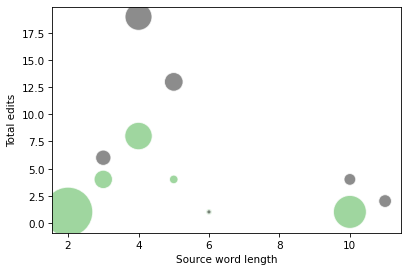

In [50]:
## Plotting prediction length vs error histogram
lang = 'izh'
vers = ''

dev = pd.read_csv('./original/'+lang+vers+'.decode.dev.tsv', sep='\t')
test = pd.read_csv('./original/'+lang+vers+'.decode.test.tsv', sep='\t')



dev_rule = pd.read_csv('../task0-data/processed/'+lang+vers+'/'+lang+vers+'.dev', sep='\t', 
names=['source','target','rule'])
test_rule = pd.read_csv('../task0-data/processed/'+lang+vers+'/'+lang+vers+'.tst', sep='\t', 
names=['source','target','rule'])


dev.insert(loc=0, column='source', value=dev_rule['source'])
dev.insert(loc=0, column='rule', value=dev_rule['rule'])

test.insert(loc=0, column='source', value=test_rule['source'])
test.insert(loc=0, column='rule', value=test_rule['rule'])

def edit_hist(df, df1, df2, names):
    cols = ['darkgoldenrod', 'lightseagreen', 'lightslategrey']
    x = [df['dist'], df1['dist'], df2['dist']]
    plt.figure(figsize=(10,7))
    plt.hist(x, bins=max(df['dist']), color=cols, label=names)
    plt.xlabel('Edit distance')
    plt.ylabel('Freq')
    plt.legend()
   
    plt.title(f"Histogram of edit distance")

# print(dev.head())
def length_vs_errors(dev, test):
    # Generate histogram of word length vs edit distance
    # Source word length
    # input is df containing source word and edit distance
    
    # length of words, add as coluimn for each lang
    dev['source_len'] = [len(e) for e in list(dev['source'])]   
    test['source_len'] = [len(e) for e in list(test['source'])]
    # Group by length. access with .index and .values, can use numpy too
    
    r1 = dev.groupby('source_len')['dist'].agg(lambda x: x.ne(0).sum())
    # r1 = dev.groupby('source_len')['dist'].mean()
    s1 = dev.groupby('source_len')['dist'].var()


    r2 = test.groupby('source_len')['dist'].agg(lambda x: x.ne(0).sum())    
    # r2 = test.groupby('source_len')['dist'].mean()
    s2 = test.groupby('source_len')['dist'].var()

    df_dev = pd.DataFrame(zip(r1.index, r1.values,s1.values, [0 for i in range(len(r1.index))]), 
                            columns=['wlength','tot_edits','group_size','dataset'])
    df_test = pd.DataFrame(zip(r2.index, r2.values,s2.values, [1 for i in range(len(r1.index))]), 
                            columns=['wlength','tot_edits','group_size','dataset'])
    
    
    df_tot = pd.concat([df_dev, df_test], axis=0)
    
    plt.scatter(x=df_tot['wlength'],
                y=df_tot['tot_edits'],
                s = df_tot['group_size']*500,
                c = df_tot['dataset'],
                cmap="Accent",
                edgecolors="white",
                alpha=0.75,
                )
    plt.xlabel("Source word length")
    plt.ylabel("Total edits")


    x1 = np.arange(max(df_tot['wlength']))

    # plt.scatter(df_tot['wlength'],df_tot['tot_edits'], c=df_tot['dataset'],)
    


# edit_hist(dev)
length_vs_errors(dev,test)

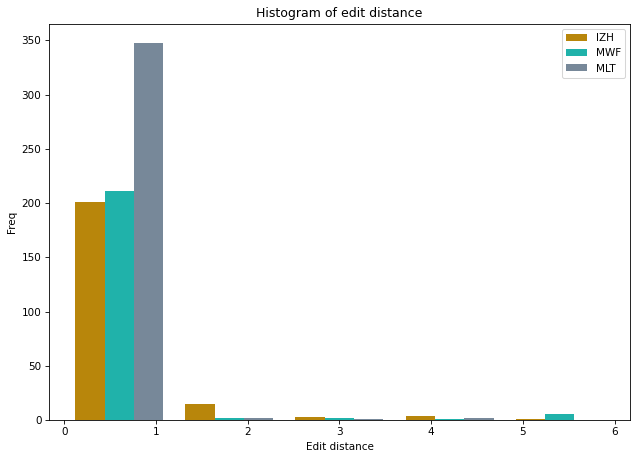

In [42]:
## Histogram of edits for all 3 langs - original 
izh = pd.read_csv('./original/izh.decode.test.tsv', sep='\t')
mwf= pd.read_csv('./original/mwf.decode.test.tsv', sep='\t')
mlt= pd.read_csv('./original/mlt.decode.test.tsv', sep='\t')
edit_hist(izh,mwf,mlt, ['IZH','MWF','MLT'])

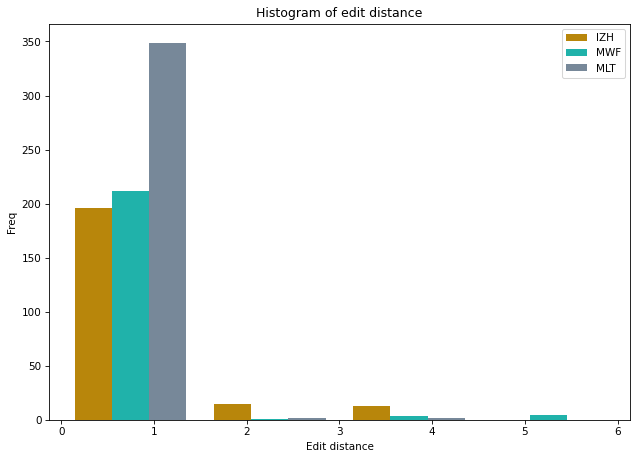

In [41]:
## Histogram of edits for all 3 langs - augmented

izh = pd.read_csv('./original/izh_d2k_o1_f_lcs-3.decode.test.tsv', sep='\t')
mwf= pd.read_csv('./original/mwf_d2k_o1_f_lcs-3.decode.test.tsv', sep='\t')
mlt= pd.read_csv('./original/mlt_d2k_o1_f_lcs-3.decode.test.tsv', sep='\t')

edit_hist(izh,mwf,mlt, ['IZH','MWF','MLT'])

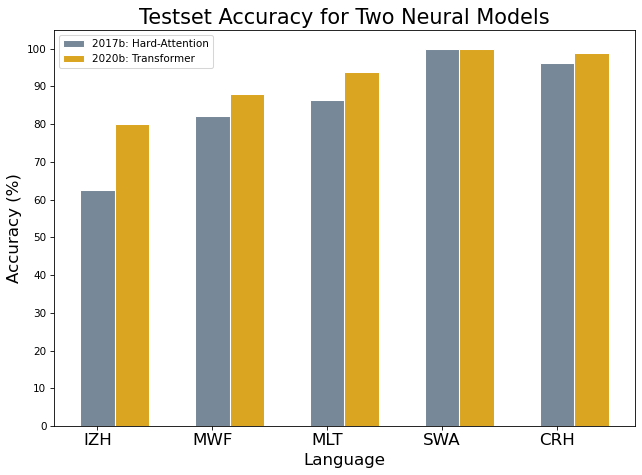

In [373]:
## Test accuracy of the two models vanilla
plt.rcParams['figure.dpi'] = 75 # default for me was 75


df = pd.read_csv('./custom_csv/1-test_acc_2models.csv', sep=',')
df.head()


barWidth=0.3

x1 = np.arange(len(df['BL_acc']))
x2= x1+barWidth
yt = list(range(0,101,10))
plt.figure(figsize=(10,7))
plt.bar(x1, df['BL_acc'], color='lightslategrey', width=barWidth, edgecolor='white', label='2017b: Hard-Attention')
plt.bar(x2, df['TRM_acc'], color='goldenrod', width=barWidth, edgecolor='white', label='2020b: Transformer')
plt.xticks([0,1,2,3,4],df.iloc[:,0], size=16)
plt.yticks(yt)
plt.xlabel('Language', size=16)
plt.ylabel('Accuracy (%)', size=16)
plt.title('Testset Accuracy for Two Neural Models', size=20)
plt.legend()



plt.show()


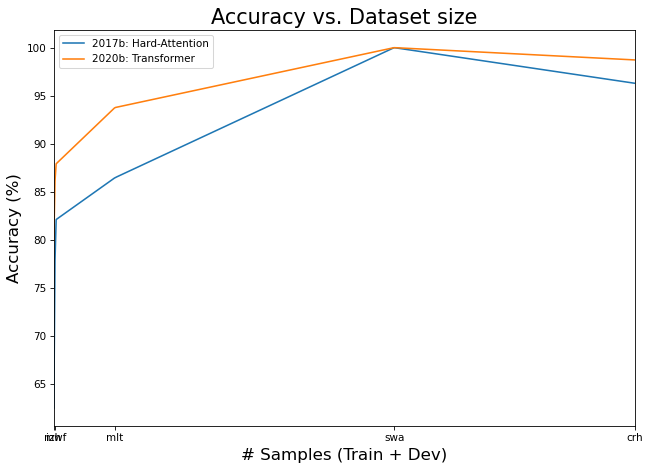

0     875
1     888
2    1409
3    3853
4    5960
Name: size, dtype: int64
Index(['Unnamed: 0', 'size', '2017_acc', '2020_acc'], dtype='object')


In [12]:
## Test accuracy of the two models vanilla vs. dataset size


plt.rcParams['figure.dpi'] = 75 # default for me was 75


df = pd.read_csv('./custom_csv/raw_set_size_vs_acc_2model.csv', sep=',')

x = df['size']
xnew = np.linspace(x.min(), x.max(), 500)

spl1 = make_interp_spline(x, df['2017_acc'], k=1)
y_smooth1 = spl1(xnew)

spl2 = make_interp_spline(x, df['2020_acc'], k=1)
y_smooth2 = spl2(xnew)
plt.figure(figsize=(10,7))
plt.plot(xnew,y_smooth1, label='2017b: Hard-Attention')
plt.plot(xnew,y_smooth2, label='2020b: Transformer')
plt.xlim((890,5961))
plt.title('Accuracy vs. Dataset size', size=20)
plt.xlabel('# Samples (Train + Dev)', size=16)
plt.ylabel('Accuracy (%)', size=16)
plt.xticks(list(plt.xticks()[0]) + )
plt.legend()
plt.show()
